In [1]:
from JSU_lib import *

# PUResNet scoring

## PUResNet + PRANK

In [48]:
puresnet_pranked = get_PRANKED_df("./../DATA/puresnet_preds_rescored", change_id = False)

Error with .DS_Store
Error with params.txt
Error with run.log


In [45]:
puresnet_pranked = pd.read_pickle("./results/puresnet_pranked_pockets_DEF_TRANS.pkl")

In [46]:
puresnet_pranked.head(5)

,rep_chain,OLD_ID,score,RANK,OLD_RANK,CHANGE,,ID
0,1a52_A,0_A_pkt,32.0635,1,1,0,,1
1,1a5h_B,0_D_pkt,9.4200,1,1,0,,1
2,1a9w_E,0_B_pkt,56.5060,1,1,0,,1
3,1au1_A,0_A_pkt,0.9604,1,1,0,,1
4,1aue_B,0_B_pkt,6.8550,1,1,0,,1


In [47]:
puresnet_prank_changes = np.array(puresnet_pranked.CHANGE.tolist())

In [53]:
puresnet_pranked.rename(columns = {"ID": "OLD_ID"}, inplace = True)

In [136]:
pocket_id_dict = read_from_pickle("./results/puresnet_pocket_name_dict.pkl")

In [55]:
puresnet_pranked["ID"] = puresnet_pranked.set_index(["rep_chain", "OLD_ID"]).index.map(pocket_id_dict)

In [57]:
puresnet_pranked.query('ID != ID')

,rep_chain,OLD_ID,score,RANK,OLD_RANK,CHANGE,,ID


In [60]:
puresnet_pranked.head(5)

,rep_chain,OLD_ID,score,RANK,OLD_RANK,CHANGE,,ID
0,1a52_A,0_A_pkt,32.0635,1,1,0,,1
1,1a5h_B,0_D_pkt,9.4200,1,1,0,,1
2,1a9w_E,0_B_pkt,56.5060,1,1,0,,1
3,1au1_A,0_A_pkt,0.9604,1,1,0,,1
4,1aue_B,0_B_pkt,6.8550,1,1,0,,1


In [58]:
len(puresnet_pranked)

3167

In [61]:
puresnet_pranked.to_pickle("./results/puresnet_pranked_pockets_DEF_TRANS.pkl")

## PUResNet + PRANK + Cons

In [48]:
puresnet_pranked_CONS = get_PRANKED_df("./../DATA/puresnet_preds_rescored_cons", change_id = False) # 0 hours 2 minutes 40.706 seconds

Error with params.txt
Error with run.log


In [137]:
puresnet_pranked_CONS.rename(columns = {"ID": "OLD_ID"}, inplace = True)

puresnet_pranked_CONS["ID"] = puresnet_pranked_CONS.set_index(["rep_chain", "OLD_ID"]).index.map(pocket_id_dict)

In [131]:
len(puresnet_pranked_CONS)

3167

In [138]:
puresnet_pranked_CONS.head(5)

,rep_chain,OLD_ID,score,RANK,OLD_RANK,CHANGE,,ID
0,1a52_A,0_A_pkt,85.9202,1,1,0,,1
1,1a5h_B,0_D_pkt,20.5193,1,1,0,,1
2,1a9w_E,0_B_pkt,110.2308,1,1,0,,1
3,1au1_A,0_A_pkt,0.6340,1,1,0,,1
4,1aue_B,0_B_pkt,7.3013,1,1,0,,1


In [139]:
puresnet_pranked_CONS.to_pickle("./results/puresnet_pranked_CONS_pockets_DEF_TRANS.pkl")

In [50]:
puresnet_prank_cons_changes = np.array(puresnet_pranked_CONS.CHANGE.tolist())

96.65


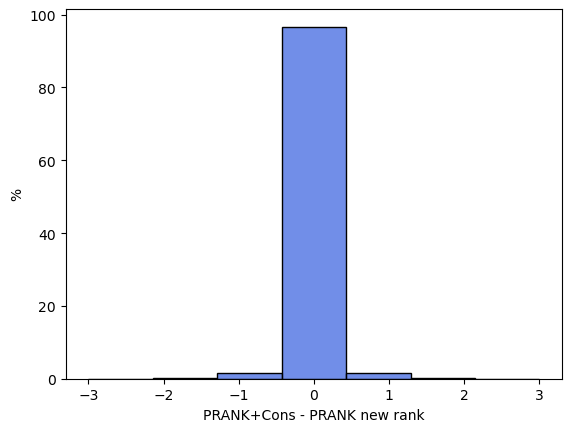

In [103]:
DIFFS_puresnet = puresnet_prank_cons_changes - puresnet_prank_changes

print(round(100*list(DIFFS_puresnet).count(0)/len(DIFFS_puresnet), 2))

sns.histplot(DIFFS_puresnet, bins=7, stat="percent", color="royalblue", binrange=(-3,3))
#plt.xlim(-100, 100)
plt.xlabel("PRANK+Cons - PRANK new rank")
plt.ylabel("%")
plt.show()

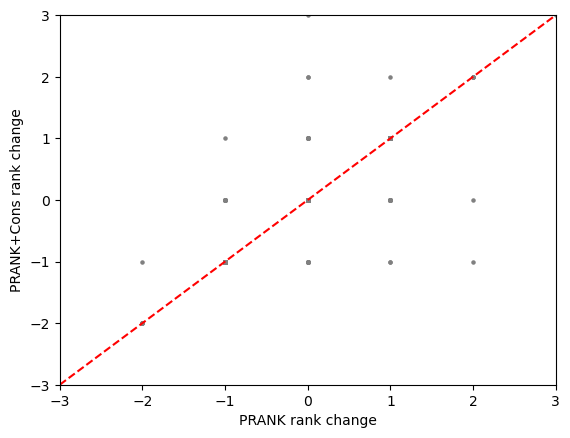

In [113]:
plt.scatter(puresnet_prank_changes, puresnet_prank_cons_changes, s = 5, c = "gray")
plt.ylim(-3, 3)
plt.xlim(-3, 3)

# Plot a diagonal dashed line
plt.plot([-3, 3], [-3, 3], linestyle='--', color='red')
plt.xlabel("PRANK rank change")
plt.ylabel("PRANK+Cons rank change")
plt.show()

# fpocket rescoring

## fpocket + PRANK

In [31]:
fpocket_pranked = get_PRANKED_df("./../DATA/fpocket_rescored")

Error with params.txt
Error with run.log


In [45]:
fpocket_pranked.head(5)

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,1,44.2707,1,1,0,
1,1a52_A,11,5.9334,2,11,9,++++++++++
2,1a52_A,4,3.6748,3,4,1,+
3,1a52_A,5,1.7828,4,5,1,+
4,1a52_A,6,1.5094,5,6,1,+


In [35]:
print(fpocket_pranked.CHANGE.min())
print(fpocket_pranked.CHANGE.max())

-294
343


In [58]:
fpocket_pranked.to_pickle("./results/fpocket_pranked_pockets_DEF_TRANS.pkl")

In [6]:
fpocket_pranked = pd.read_pickle("./results/fpocket_pranked_pockets_DEF_TRANS.pkl")

In [27]:
prank_changes = np.array(fpocket_pranked.CHANGE.tolist())

## fpocket + PRANK + CONS

In [2]:
fpocket_pranked_CONS = get_PRANKED_df("./../DATA/fpocket_rescored_cons") # 0 hours 6 minutes 43.878 seconds

Error with params.txt
Error with run.log


In [4]:
fpocket_pranked_CONS.head()

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,1,76.0657,1,1,0,
1,1a52_A,11,13.4611,2,11,9,++++++++++
2,1a52_A,6,3.0971,3,6,3,+++
3,1a52_A,4,2.7441,4,4,0,
4,1a52_A,12,1.6281,5,12,7,+++++++


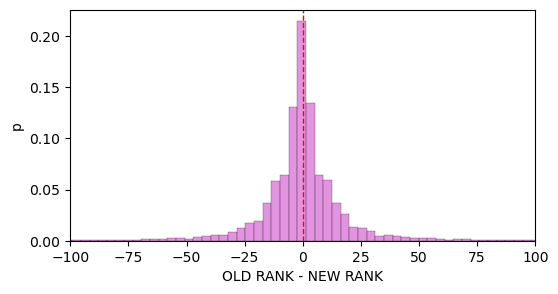

In [5]:
# Plotting the histogram
plt.figure(figsize=(6,3), dpi=100)
sns.histplot(fpocket_pranked_CONS.CHANGE, bins=175, stat="proportion", color="orchid")
#plt.title("Distance Histogram")
plt.xlabel(f"OLD RANK - NEW RANK")
plt.ylabel("p")
plt.xlim(-100, 100)
plt.axvline(x = 0, linestyle = "--", linewidth = 1, color = "r")
plt.show()

In [26]:
prank_cons_changes = np.array(fpocket_pranked_CONS.CHANGE.tolist())

In [24]:
fpocket_pranked.query('CHANGE != CHANGE')

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,,abs_change


In [23]:
fpocket_pranked_CONS.query('CHANGE != CHANGE')

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,


21.66


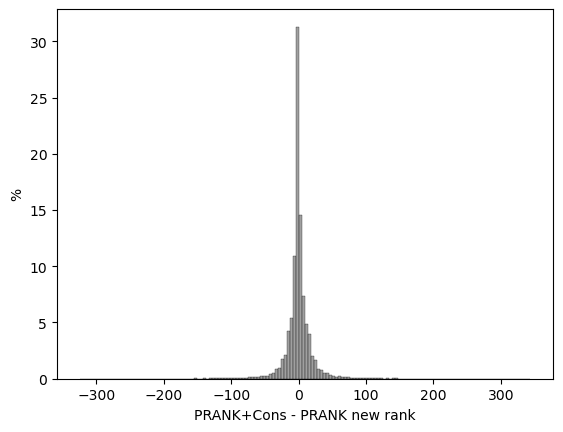

In [110]:
DIFFS_fpocket = prank_cons_changes - prank_changes

print(round(100*list(DIFFS_fpocket).count(0)/len(DIFFS_fpocket), 2))

sns.histplot(DIFFS_fpocket, bins = 150, stat="percent", color="gray")#, binrange=(-3,3))
#plt.xlim(-100, 100)
plt.xlabel("PRANK+Cons - PRANK new rank")
plt.ylabel("%")
plt.show()

21.66


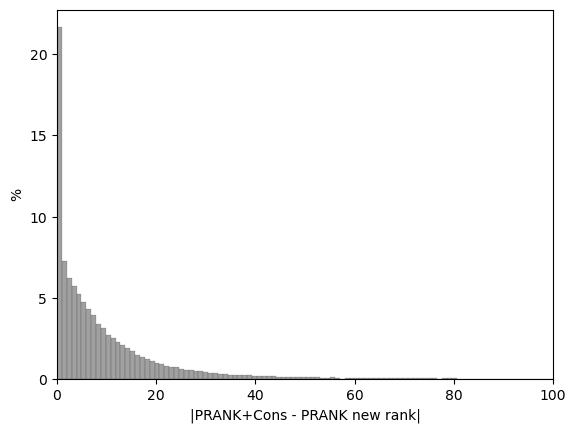

In [80]:
abs_DIFFS = [abs(el) for el in DIFFS]

print(round(100*list(abs_DIFFS).count(0)/len(abs_DIFFS), 2))

sns.histplot(abs_DIFFS, bins=350, stat="percent", color="gray")
plt.xlim(0, 100)
plt.xlabel("|PRANK+Cons - PRANK new rank|")
plt.ylabel("%")
plt.show()

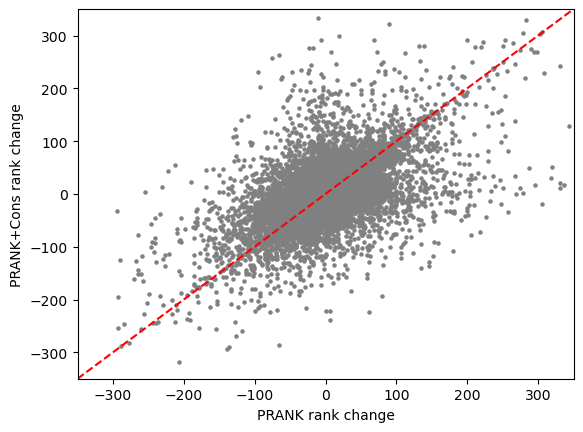

In [51]:
plt.scatter(prank_changes, prank_cons_changes, s = 5, c = "gray")
plt.ylim(-350, 350)
plt.xlim(-350, 350)

# Plot a diagonal dashed line
plt.plot([-350, 350], [-350, 350], linestyle='--', color='red')
plt.xlabel("PRANK rank change")
plt.ylabel("PRANK+Cons rank change")
plt.show()

In [52]:
fpocket_pranked_CONS.to_pickle("./results/fpocket_pranked_CONS_pockets_DEF_TRANS.pkl")

# PocketFinder scoring

## PocketFinder + PRANK

In [116]:
pocketfinder_pranked = get_PRANKED_df("./../DATA/pocketfinder_preds_rescored")

Error with params.txt
Error with run.log


In [117]:
pocketfinder_pranked.head(5)

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,3,30.4977,1,3,2,++
1,1a52_A,2,7.2364,2,2,0,
2,1a52_A,4,5.8188,3,4,1,+
3,1a52_A,5,1.3985,4,5,1,+
4,1a52_A,1,0.5820,5,1,-4,----


In [39]:
pocketfinder_pranked.to_pickle("./results/pocketfinder_pranked_pockets_DEF_TRANS.pkl")

## PocketFinder + PRANK + Cons

In [82]:
pocketfinder_pranked_cons = get_PRANKED_df("./../DATA/pocketfinder_preds_rescored_cons") # 0 hours 2 minutes 58.769 seconds

Error with params.txt
Error with run.log


In [91]:
pocketfinder_pranked_cons.head(5)

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,3,77.6260,1,3,2,++
1,1a52_A,4,9.2178,2,4,2,++
2,1a52_A,2,8.4033,3,2,-1,-
3,1a52_A,5,0.6062,4,5,1,+
4,1a52_A,1,0.6043,5,1,-4,----


In [133]:
pocketfinder_pranked_cons.to_pickle("./results/pocketfinder_pranked_CONS_pockets_DEF_TRANS.pkl")

72.61


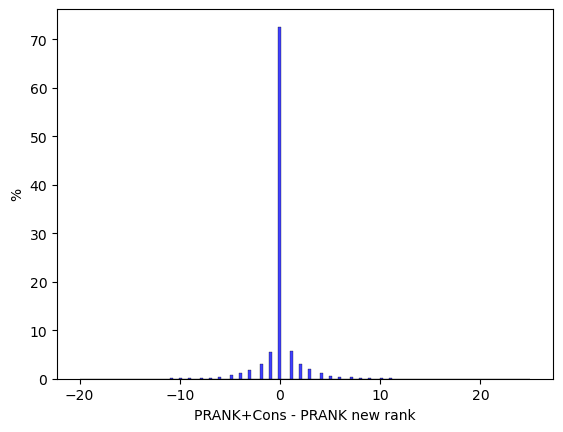

In [118]:
prank_changes_pocketfinder = np.array(pocketfinder_pranked.CHANGE.tolist())
prank_cons_changes_pocketfinder = np.array(pocketfinder_pranked_cons.CHANGE.tolist())

DIFFS_pocketfinder = prank_cons_changes_pocketfinder - prank_changes_pocketfinder

print(round(100*list(DIFFS_pocketfinder).count(0)/len(DIFFS_pocketfinder), 2))

sns.histplot(DIFFS_pocketfinder, bins = 150, stat="percent", color="blue")#, binrange=(-3,3))
#plt.xlim(-100, 100)
plt.xlabel("PRANK+Cons - PRANK new rank")
plt.ylabel("%")
plt.show()

# Ligsite scoring

In [92]:
pocketfinder_pranked_cons.to_pickle("./results/pocketfinder_pranked_CONS_pockets_DEF_TRANS.pkl")

## LigSite + PRANK

In [120]:
ligsite_pranked = get_PRANKED_df("./../DATA/ligsite_preds_rescored")

Error with .DS_Store
Error with params.txt
Error with run.log


In [121]:
ligsite_pranked.head(5)

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,1,35.8552,1,1,0,
1,1a52_A,2,7.4068,2,2,0,
2,1a5h_B,2,14.4832,1,2,1,+
3,1a5h_B,1,10.8580,2,1,-1,-
4,1a9w_E,1,65.8163,1,1,0,


In [37]:
ligsite_pranked.to_pickle("./results/ligsite_pranked_pockets_DEF_TRANS.pkl")

## Ligsite + PRANK + Cons

In [122]:
ligsite_pranked_cons = get_PRANKED_df("./../DATA/ligsite_preds_rescored_cons") # 0 hours 2 minutes 55.365 seconds

Error with params.txt
Error with run.log


In [123]:
ligsite_pranked_cons.head(5)

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,1,85.4594,1,1,0,
1,1a52_A,2,13.8353,2,2,0,
2,1a5h_B,2,26.5277,1,2,1,+
3,1a5h_B,1,20.0653,2,1,-1,-
4,1a9w_E,1,126.3950,1,1,0,


In [90]:
ligsite_pranked_cons.to_pickle("./results/ligsite_pranked_CONS_pockets_DEF_TRANS.pkl")

77.75


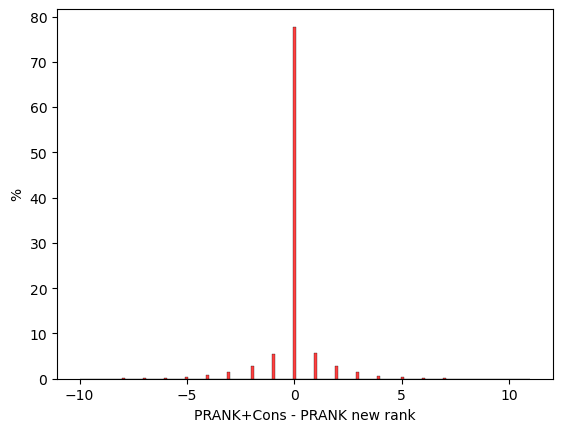

In [125]:
prank_changes_ligsite = np.array(ligsite_pranked.CHANGE.tolist())
prank_cons_changes_ligsite = np.array(ligsite_pranked_cons.CHANGE.tolist())

DIFFS_ligsite = prank_cons_changes_ligsite - prank_changes_ligsite

print(round(100*list(DIFFS_ligsite).count(0)/len(DIFFS_ligsite), 2))

sns.histplot(DIFFS_ligsite, bins = 150, stat="percent", color="red")#, binrange=(-3,3))
#plt.xlim(-100, 100)
plt.xlabel("PRANK+Cons - PRANK new rank")
plt.ylabel("%")
plt.show()

## SurfNet + PRANK

In [128]:
surfnet_pranked = get_PRANKED_df("./../DATA/surfnet_preds_rescored")

Error with params.txt
Error with run.log


In [129]:
surfnet_pranked.head(5)

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,3,35.9118,1,3,2,++
1,1a52_A,2,7.6292,2,2,0,
2,1a52_A,1,5.1668,3,1,-2,--
3,1a52_A,4,3.7534,4,4,0,
4,1a5h_B,2,8.4763,1,2,1,+


In [38]:
surfnet_pranked.to_pickle("./results/surfnet_pranked_pockets_DEF_TRANS.pkl")

## SurfNet + PRANK + Cons

In [126]:
surfnet_pranked_CONS = get_PRANKED_df("./../DATA/surfnet_rescored_cons") # 0 hours 3 minutes 5.015 seconds

Error with params.txt
Error with run.log


In [127]:
surfnet_pranked_CONS.head(5)

,rep_chain,ID,score,RANK,OLD_RANK,CHANGE,
0,1a52_A,3,97.3518,1,3,2,++
1,1a52_A,1,11.2193,2,1,-1,-
2,1a52_A,2,8.2490,3,2,-1,-
3,1a52_A,4,2.5027,4,4,0,
4,1a5h_B,2,18.5924,1,2,1,+


In [86]:
surfnet_pranked_CONS.to_pickle("./results/surfnet_pranked_CONS_pockets_DEF_TRANS.pkl")

67.72


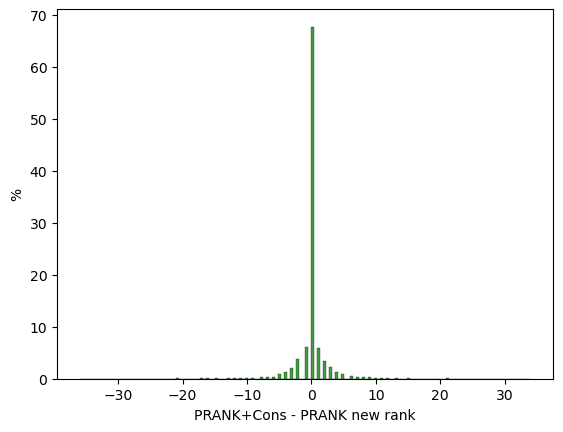

In [130]:
prank_changes_surfnet = np.array(surfnet_pranked.CHANGE.tolist())
prank_cons_changes_surfnet = np.array(surfnet_pranked_CONS.CHANGE.tolist())

DIFFS_surfnet = prank_cons_changes_surfnet - prank_changes_surfnet

print(round(100*list(DIFFS_surfnet).count(0)/len(DIFFS_surfnet), 2))

sns.histplot(DIFFS_surfnet, bins = 150, stat="percent", color="green")#, binrange=(-3,3))
#plt.xlim(-100, 100)
plt.xlabel("PRANK+Cons - PRANK new rank")
plt.ylabel("%")
plt.show()